### TODO
* copy in other file
* find unused code
* doublecheck zeropoints
* doublecheck catalogue
* check folder - a temp data folder
* catalogue referencing later is not with variablized
* update planck cosmology

In [11]:
catalogue = "gds/jades/phot/hlsp_jades_jwst_nircam_goods-s-deep_photometry_v1.0_catalog_large_withSpec.fits"
cat_out_name = "gds_jwst_nircam_large_withSpec"
# template names and paths
"""ftempl_strs = [#! use ; to indicate modifications
    'fsps_45k;linearcomb',
    'fsps_45k;0.3removed',
    'EMLines;linearcomb',
    'EMextreme',
    'EMlines',
    'fsps_45k',
    'fsps_60k',
    'carnall_sfhz_13',
    'corr_sfhz_13',
    'blue_sfhz_13',
    #'eazy_v1.1_lines.spectra', 
    'eazy_v1.3.spectra',
    #'br07_default.spectra',
    #'pegase.spectra',
    #'pegase13.spectra',
    #'cww+kin.spectra'
    ]
ftempl_labels = [
    "F45k;LC",
    "F45k;0.3r",
    "EMLi;LC",
    "EMEx",
    "EMLi",
    "F45k",
    "F60k",
    "CASFH",
    "COSFH",
    "BLSFH",
    #"EAZL",
    "EAZ3",
    #"BR07",
    #"PEG",
    #"PEG13",
    #"CWWK"
    ]"""
ftempl_labeldict = {
    'fsps_45k;linearcomb': "F45k;LC",
    'fsps_45k;0.3removed': "F45k;0.3r",
    'EMLines;linearcomb': "EMLi;LC",
    'EMextreme': "EMEx",
    'EMlines': "EMLi",
    'fsps_45k': "F45k",
    'fsps_60k': "F60k",
    'carnall_sfhz_13': "CASFH",
    'corr_sfhz_13': "COSFH",
    'blue_sfhz_13': "BLSFH",
    #"EAZL",
    'eazy_v1.3.spectra': "EAZ3",
    #"BR07",
    #"PEG",
    #"PEG13",
    #"CWWK"
}

In [12]:
import os
ftempl_strs = []
ftempl_labels = []
for f in os.listdir("templates2test"):
    if f.endswith(".param"):
        templ_str = f.split(".param")[0]
        ftempl_strs.append(templ_str)
        try:
            ftempl_labels.append(ftempl_labeldict[templ_str])
        except KeyError:
            raise KeyError("No label for template: ", templ_str)
    else: continue
    print("Found template: ", templ_str)
    print("Label: ", ftempl_labeldict[templ_str])
    print("")

Found template:  fsps_45k;0.3removed
Label:  F45k;0.3r

Found template:  corr_sfhz_13
Label:  COSFH

Found template:  fsps_60k
Label:  F60k

Found template:  EMextreme
Label:  EMEx

Found template:  blue_sfhz_13
Label:  BLSFH

Found template:  carnall_sfhz_13
Label:  CASFH

Found template:  eazy_v1.3.spectra
Label:  EAZ3

Found template:  EMlines
Label:  EMLi

Found template:  EMLines;linearcomb
Label:  EMLi;LC

Found template:  fsps_45k
Label:  F45k

Found template:  fsps_45k;linearcomb
Label:  F45k;LC



In [14]:
import eazy

#import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import numpy as np

#import pandas as pd
import time
from math import ceil#, floor
from copy import deepcopy as copy
import shutil
from astropy import units as u
from astropy.cosmology import Planck18
from astropy.io import fits
from astropy.table import Table, join#, hstack
#from astropy.visualization import ZScaleInterval as zs
#from astroquery.mast import Observations as obs
#from IPython.utils import io
#from matplotlib.transforms import Affine2D
#from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import eazy_routines as ez
import helper_module as hmod

if not os.path.exists('templates'):
    eazy.symlink_eazy_inputs()
    for f in os.listdir("templates2test"):
        shutil.copy("templates2test/"+f, "templates/"+f, follow_symlinks=True, exist_ok=True)


cosmo = Planck18
del Planck18

plt.style.use('seaborn-v0_8-colorblind')

if "temp" not in os.listdir():
    os.mkdir("temp")

In [ ]:
# log all camera filters
flt = eazy.filters.FilterFile()

filts_nircam = {
        'F090W': 363,
        'F115W': 364,
        'F150W': 365,
        'F182M': 370,
        'F200W': 366,
        'F210M': 371,
        'F277W': 375,
        'F335M': 381,
        'F356W': 376,
        'F410M': 383,
        'F430M': 384,
        'F444W': 358,
        'F460M': 385,
        'F480M': 386
}

filts_HST = {
        'F105W': 202,
        'F125W': 203,
        'F140W': 204,
        'F160W': 205,
        'F435W': 233,
        'F606W': 214,
        'F775W': 216,
        'F814W': 239,
        'F850LP': 240
}

filts_wavelengths = {#!actually check
        'F090W': 0.9024,
        'F115W': 1.1534,
        'F150W': 1.5024,
        'F182M': 1.8224,
        'F200W': 1.9924,
        'F210M': 2.1024,
        'F277W': 2.7724,
        'F335M': 3.3524,
        'F356W': 3.5624,
        'F410M': 4.1024,
        'F430M': 4.3024,
        'F444W': 4.4424,
        'F460M': 4.6024,
        'F480M': 4.8024,
        'F105W': 1.0534,
        'F125W': 1.2534,
        'F140W': 1.4034,
        'F160W': 1.6034,
        'F435W': 0.4325,
        'F606W': 0.5918,
        'F775W': 0.7699,
        'F814W': 0.8055,
        'F850LP': 0.9033
}

filts = {**filts_nircam, **filts_HST}
del filts_HST, filts_nircam

mw_reddening = ez.get_atten_dict(filts)#!is used?

# get zeropoints
zps = [1.0]*len(filts)#!should be evaluated if this is correct

In [ ]:
#=== load data
#inname = "hlsp_jades_jwst_nircam_goods-s-deep_photometry_v1.0_catalog.fits"
inname = catalogue.split('/')[-1]
inpath = os.path.join(os.getenv('astrodata'), catalogue)

# print the meta info
with fits.open(inpath) as hdul:
    print(hdul.info())

# load photometry table
tab = Table.read(inpath, hdu=6)
tab_redshifts = Table.read(inpath, hdu=9)

#=== make EAZY table

# load fluxes
# CIRC1: 0.10 arcsec aperture (see README)
ext = '_CIRC1'
cols_dummy = hmod.get_matches(ext, tab.columns, exclude='_ei')
cols_f = np.sort(hmod.get_matches(ext, cols_dummy, exclude='_e'))
cols_fe = np.sort(hmod.get_matches('_e', cols_dummy))
cols_fluxes = list(np.vstack([cols_f, cols_fe]).T.flatten())
cols = list(np.insert(cols_fluxes, 0, ['ID', 'RA', 'DEC', 'z_spec']))
del cols_dummy

tab = join(tab, tab_redshifts['ID', 'z_spec'], join_type='inner', keys='ID')
tab_out = tab[cols]

# convert from nJy to uJy
# and apply MW reddening
keys = np.array(list(mw_reddening.keys()))
for c in cols_fluxes:
    tab_out[c].unit = u.nJy
    tab_out[c] = tab_out[c].to(u.uJy)
    
    # apply MW reddening
    matches = hmod.get_matches(keys, c, get_idxs=True)
    key = keys[np.int32(matches[:,0])][0]
    tab_out[c] *= mw_reddening[key]
del c, keys, key, matches
    
# rename columns
for c in cols_f:
    cnew = c.replace(ext, '_flux')
    tab_out.rename_column(c, cnew)
del c, cnew

for c in cols_fe:
    cnew = c.replace(ext+'_e', '_err')
    tab_out.rename_column(c, cnew)
del c, cnew

#=== apply MW reddening
#atten_dict = ez.get_atten_dict(filts_eazyres, filts_str)
#degr_image_sig *= atten_dict[filt] / 100. # uJy

# save EAZY table
tab_out.write(f'temp/{cat_out_name}.fits', format='fits', overwrite=True)
del tab_out, tab, tab_redshifts

Filename: /home/ubuntu-compute/Desktop/astrodata/gds/jades/phot/hlsp_jades_jwst_nircam_goods-s-deep_photometry_v1.0_catalog_large_withSpec.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      13   ()      
  1  FILTERS       1 BinTableHDU     33   23R x 12C   [6A, E, E, E, E, E, E, E, E, E, E, E]   
  2  FLAG          1 BinTableHDU    161   1429R x 75C   [J, D, D, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, I, E, E]   
  3  SIZE          1 BinTableHDU    100   1429R x 43C   [J, D, D, E, D, D, D, D, J, J, J, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
  4  CIRC          1 BinTableHDU    856   1429R x 423C   [J, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E,

None


In [ ]:
runTime = int(time.time())

In [ ]:
#=== set up paths for eazy

# catalog paths
cat_path = f'temp/{cat_out_name}.fits'
keys_id = ['ID id', 'RA ra', 'DEC dec', 'z_spec z_spec']



templ_paths = [f"templates/{e}.param" for e in ftempl_strs]
out_names = [f for f in ftempl_strs]
out_paths = [f"eazy-output/{f}_{runTime}" for f in out_names]
#paths = np.array([templ_paths, out_paths]).T

In [ ]:
##################### RUN EAZY #####################

# iterate over tempalte sets
for tpath, opath, oname in zip(templ_paths, out_paths, out_names):
    
    params = {"cat_path": cat_path,
              "templ_path": tpath,
              "out_path": opath,
              "FIX_ZSPEC": 'n',
              "USE_ZSPEC_FOR_REST": 'n',
              "Z_MAX": 12.0,
              "H0": cosmo.H0,
              "OMEGA_M": cosmo.Om0,
              "OMEGA_L": cosmo.Ode0,
              "CATALOG_FORMAT": 'fits'}
    
    # write eazy config files
    filt_num, fnames = ez.write_config(f'{cat_out_name}_{oname}', filts, zps, keys_id,
                                       out_path=opath)

    # run eazy
    #idx = np.array([0])
    idx = None
    #zout, hdu = ez.run_eazy(params, fnames, n_proc=-1, idx=idx)
    __, __ = ez.run_eazy(params, fnames, n_proc=-1, idx=idx)
    del idx, params, filt_num, fnames, tpath, opath, oname

Read default param file: /home/ubuntu-compute/miniconda3/envs/astro/lib/python3.11/site-packages/eazy/data/zphot.param.default
Read CATALOG_FILE: temp/gds_jwst_nircam_large_withSpec.fits
   >>> NOBJ = 1429
F090W_flux F090W_err (363): jwst_nircam_f090w
F115W_flux F115W_err (364): jwst_nircam_f115w
F150W_flux F150W_err (365): jwst_nircam_f150w
F182M_flux F182M_err (370): jwst_nircam_f182m
F200W_flux F200W_err (366): jwst_nircam_f200w
F210M_flux F210M_err (371): jwst_nircam_f210m
F277W_flux F277W_err (375): jwst_nircam_f277w
F335M_flux F335M_err (381): jwst_nircam_f335m
F356W_flux F356W_err (376): jwst_nircam_f356w
F410M_flux F410M_err (383): jwst_nircam_f410m
F430M_flux F430M_err (384): jwst_nircam_f430m
F444W_flux F444W_err (358): jwst_niriss_f444w
F460M_flux F460M_err (385): jwst_nircam_f460m
F480M_flux F480M_err (386): jwst_nircam_f480m
F105W_flux F105W_err (202): hst/wfc3/IR/f105w.dat
F125W_flux F125W_err (203): hst/wfc3/IR/f125w.dat
F140W_flux F140W_err (204): hst/wfc3/IR/f140w.dat


/home/ubuntu-compute/miniconda3/envs/astro/lib/python3.11/site-packages/eazy/photoz.py:1326: RuntimeWarning: invalid value encountered in log10
  self.prior_mag_cat += -2.5*np.log10(np.squeeze(self.fnu[:,ix]))
  0%|          | 0/4 [00:03<?, ?it/s]


KeyboardInterrupt: 

In [ ]:
#find latest runTime in folder:
runtimeNum = -2
runTimes = np.sort([int(f.split('_')[-1]) for f in os.listdir('eazy-output')])
runTimes = np.unique(runTimes)
runTime = int(runTimes[runtimeNum])
outpaths = 'eazy-output/{ftempl}_{runTime}/' + cat_out_name + '.zout.fits'
print("Picking runTime:", runTime)
del runTimes, runtimeNum

Picking runTime: 1696803274


In [ ]:
##################### READ EAZY OUTPUT #####################
rawSets = {}
for ftempl in ftempl_strs:
    outpath = outpaths.format(ftempl=ftempl, runTime=runTime)
    if f'{ftempl}_{runTime}' not in os.listdir('eazy-output'):
        continue
    if cat_out_name + '.zout.fits' not in os.listdir(outpath.rsplit('/', 1)[0]):
        continue
    rawSets[ftempl] = Table.read(outpath)
del ftempl, outpath

In [ ]:
##################### READ REDSHIFT OUTPUT #####################
redshiftSets = {}
for key in rawSets.keys():
    tbl = rawSets[key]
    data = {}
    data['ID'] = tbl['id']
    data['z_spec'] = tbl['z_spec']
    data['z_phot'] = tbl['z_phot']
    data['z_phot_chi2'] = tbl['z_phot_chi2']
    data['z_phot_risk'] = tbl['z_phot_risk']
    redshiftSets[key] = Table(
        data = [d for d in data.values()],
        names = [d for d in data.keys()]
    )
del key, tbl, data

In [ ]:
##################### PHOTOMETRY DATA #####################
#copy photometry data to every template set (for convenience)
photSets = {}
for key in rawSets.keys():
    tbl = rawSets[key]
    data = {}
    data['ID'] = tbl['id']
    data['chi2'] = tbl['z_phot_chi2']
    for tblkey in tbl.keys():
        if tblkey.startswith('rest'):
            data[tblkey] = tbl[tblkey]
    #for each object, check if the photometry is valid
    #if not, remove
    for i in list(range(len(data['ID'])))[::-1]:
        dataValid = True
        restPhotVals = []
        for p in data.keys():
            if "rest" not in p: continue
            if data[p][i] < 0: dataValid = False
            if "err" not in p: restPhotVals.append(data[p][i])
        if np.sum(restPhotVals) == 0: dataValid = False
        if not dataValid:
            for p in data.keys(): data[p] = np.delete(data[p], i)
    #convert to table
    photSets[key] = Table(
        data = [d for d in data.values()],
        names = [d for d in data.keys()]
    )
del key, tbl, data, tblkey


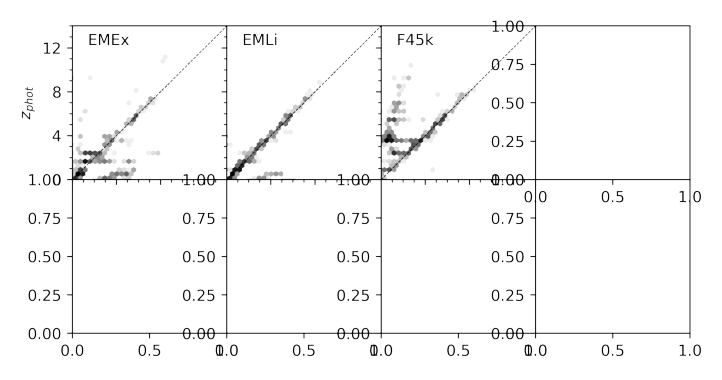

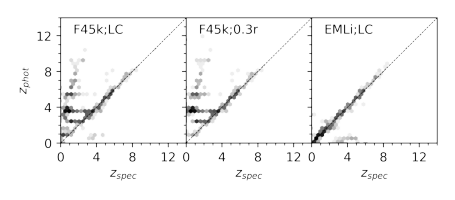

In [ ]:
##################### PLOT REDSHIFT OUTPUT #####################
#TODO: needs tiling color by accumulative flux
mosTiling = 4
zMax = 14
mm = 1/25.4
figwidth = 183*mm
DPI = 500

for mode in ['default', 'modified']:
    mode_ftempl_lbls = copy(ftempl_labels)
    mode_ftempl_strs = copy(ftempl_strs)
    if mode == 'modified': 
        mode_ftempl_lbls = [s for s in mode_ftempl_lbls if ";" in s]
        mode_ftempl_strs = [s for s in mode_ftempl_strs if ";" in s]
    if mode == 'default': 
        mode_ftempl_lbls = [s for s in mode_ftempl_lbls if ";" not in s]
        mode_ftempl_strs = [s for s in mode_ftempl_strs if ";" not in s]

    
    mosaicLen = ceil(len(mode_ftempl_lbls)/mosTiling)
    
    figsize = (1*figwidth,1*figwidth/mosTiling*mosaicLen)
    tiling = (mosaicLen,mosTiling)
    if len(mode_ftempl_lbls) < mosTiling:
        figsize = (1*figwidth/mosTiling*len(mode_ftempl_lbls),1*figwidth/mosTiling)
        tiling = (1,len(mode_ftempl_lbls))

    figMos, axsMos = plt.subplots(*tiling, figsize=figsize, dpi=DPI, facecolor=(1,1,1,0))
    #transpose and flatten
    if len(mode_ftempl_lbls) > 1:
        #axsMos = axsMos.T
        axsMos = axsMos.flatten()
    else:
        axsMos = [axsMos]
    plt.subplots_adjust(wspace=0, hspace=0)
    for i, ftempl in enumerate(mode_ftempl_strs):
        if ftempl not in redshiftSets.keys():
            continue
        redshiftTbl = redshiftSets[ftempl]

        #outpath = outpaths.format(ftempl=ftempl, runTime=runTime)

        """#find light intensities
        ids = df_props['id'].values
        filtTab = Table.read(inpath, hdu=4)
        #get values ending with "CIRC1"
        pointIDs = filtTab['ID']
        filtTab = filtTab[[f for f in filtTab.colnames if f.endswith('CIRC1')]]
        #get dictionary version of table
        filtTab = filtTab.to_pandas()
        keys = filtTab.keys()
        fluxes = np.array([np.array(filtTab[key]) for key in keys]).T
        pointIntensities = np.sum(fluxes, axis=1)"""

        """#clear up bad ids and make simular sort
        for j,id in list(enumerate(ids))[::-1]:
            if id not in df_props['id'].values:
                pointIntensities = np.delete(pointIntensities, j)
                ids = np.delete(ids, j)
        #sort pointIntensities and ids to match df_props
        pointIntensities = pointIntensities[np.argsort(ids)]
        ids = np.sort(ids)
        antiSort = np.argsort(df_props['id'].values)
        sort = np.argsort(antiSort)
        pointIntensities = pointIntensities[sort]
        ids = ids[sort]"""
        #Remove sub zero and nan
        mask_cur = (redshiftTbl['z_spec'] > 0) & (~np.isnan(redshiftTbl['z_spec'])) & (~np.isnan(redshiftTbl['z_phot']))
        x = np.array(redshiftTbl['z_spec'])
        y = np.array(redshiftTbl['z_phot'])
        #above = y > x + (1 + x) * 0.15 # outliers
        #below = y < x - (1 + x) * 0.15
        #outlier = above | below
        #mask_in = mask_cur & (~outlier)
        x = x[mask_cur]
        y = y[mask_cur]
        #mask_out = mask_cur & outlier
        #chi2_fit = redshiftTbl['z_phot_chi2'][mask_cur]/len(redshiftTbl.keys())#!new
        #avgchi2_fit = np.mean(chi2_fit)
        #medchi2_fit = np.median(chi2_fit)
        
        #avgchi2_fit_in = redshiftTbl['z_phot_chi2'][mask_in]/len(x)#!new
        #c = np.log10(pointIntensities[mask_cur])*((x/(1+x))**2)#!quilitative reshift scaling
        #c = np.ones(len(x))

        #calculate chi2 with linear regression of x and y
        chi2 = np.sum((y - x)**2/1)/len(x)#/len(x)#!dunno what to put for sigma

        xmin, xmax = np.c_[[x, y]].min(), np.c_[[x, y]].max()

        #axsMos[i].scatter(x, y, s=2.0, color='k')
        #hexbin with colorbar
        axsMos[i].hexbin(x, y, gridsize=30, cmap='Greys', mincnt=1, edgecolors='none', bins='log')
        #plt.colorbar(axsMos[i].collections[0], ax=axsMos[i], label='log$_{10}$(N)')
        axsMos[i].plot([0, 100], [0, 100], c='k', ls='--', lw=0.5)
        
        #dict_stat = hmod.phot_spec_zs_stats(y, x)

        #annotate in top left
        annotAnchor = (0.05, 0.95)
        #axsMos[i].set_title(f'{ftempl}', fontsize=10)
        ax, ay = 10, 95        
        axsMos[i].annotate(f'{mode_ftempl_lbls[i]}', xy=annotAnchor, xycoords='axes fraction', fontsize=10, ha='left', va='top', xytext=(ax, ay), textcoords='axes points')


        axsMos[i].set_xlim(0,zMax)
        axsMos[i].set_ylim(0,zMax)

        axsMos[i].xaxis.set_minor_locator(MultipleLocator(1))
        axsMos[i].yaxis.set_minor_locator(MultipleLocator(1))
        axsMos[i].xaxis.set_major_locator(MultipleLocator(4))
        axsMos[i].yaxis.set_major_locator(MultipleLocator(4))

        if i % mosTiling != 0: axsMos[i].set_yticklabels([])
        else: axsMos[i].set_ylabel('$z_{phot}$', fontsize=10)
        if i < len(mode_ftempl_lbls)-mosTiling: axsMos[i].set_xticklabels([])
        else: axsMos[i].set_xlabel('$z_{spec}$', fontsize=10)

    for i in range(len(axsMos)):
        if i > len(mode_ftempl_lbls)-1:
            axsMos[i].axis('off')

    """if len(ftempl_strs) % 3 != 0:
        axsMos[-1].axis('off')
    if len(ftempl_strs) % 3 == 1:
        axsMos[-2].axis('off')"""

    #axis label
    #figMos.text(0.5, 0.05, '$z_{spec}$', ha='center', va='center')
    #figMos.text(0.05, 0.5, '$z_{phot}$', ha='center', va='center', rotation='vertical')

    figMos.savefig(f'./figures/zs_mosaic_{mode}.png', dpi=DPI, bbox_inches='tight', transparent=True)
    figMos.clf()
    plt.close(figMos)
    #show by loading image
    img = plt.imread(f'./figures/zs_mosaic_{mode}.png')
    fig = plt.figure(figsize=(1*figwidth,1*figwidth/mosTiling*mosaicLen), dpi=100, facecolor=(1,1,1,0))
    ax = fig.add_axes([0,0,1,1])
    ax.axis('off')
    ax.imshow(img)


[270. 274. 120. 121. 156. 157. 158. 159. 160. 161. 162. 163.]


ValueError: 'x' and 'y' must have the same size

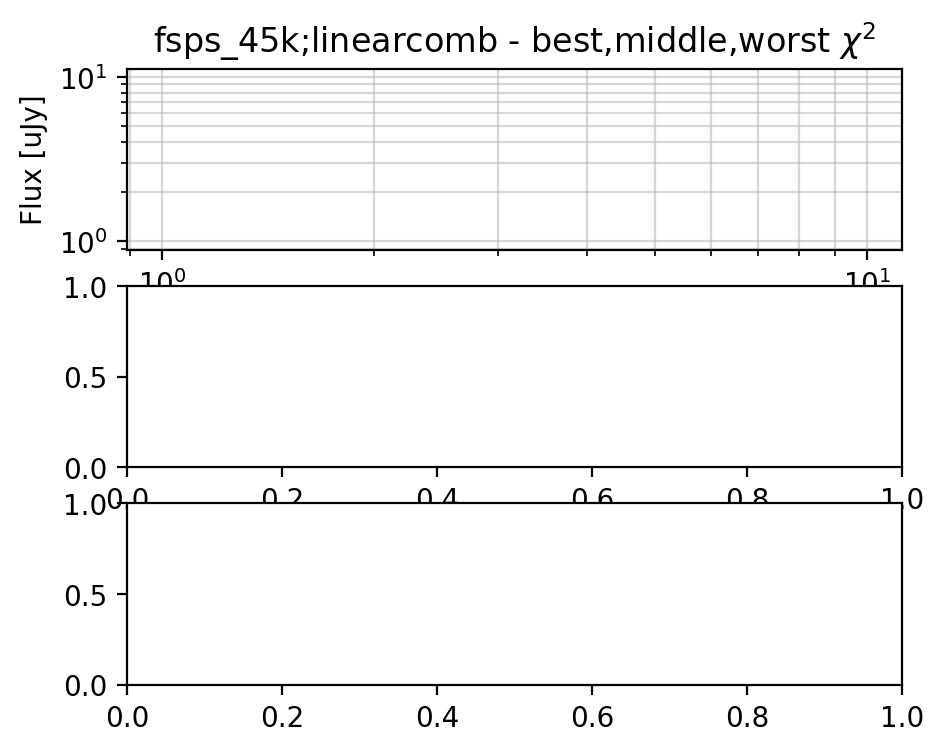

In [ ]:
##################### PLOT RESTFRAME SEDS #####################
#! WIP
#take the 10 worst chi2 and 10 best chi2
#for now, just plot restframe photometry
for key in photSets.keys():
    tbl = photSets[key]
    chi2s = tbl['chi2']
    sort = list(np.argsort(chi2s))
    include = [0,len(sort)//2,-1]
    sort = np.array(sort)[include]
    del include

    phot_vals = np.array([np.array(tbl[key]) for key in tbl.keys() if key.startswith('rest') and "err" not in key])
    phot_errs = np.array([np.array(tbl[key]) for key in tbl.keys() if key.startswith('rest') and key.endswith('err')])

    chi2s = chi2s[sort]
    phot_vals = phot_vals.T[sort]
    phot_errs = phot_errs.T[sort]

    #plot
    fig, axs = plt.subplots(len(sort),1,figsize=(5,4), dpi=200, facecolor=(1,1,1,0))
    #set title
    axs[0].set_title(rf'{key} - best,middle,worst $\chi^2$')
    for i in range(len(sort)):
        ax = axs[i]
        ax.set_xscale('log')
        ax.set_yscale('log')

        ax.set_xlabel('Wavelength [micron]')
        ax.set_ylabel('Flux [uJy]')#! doublecheck
        
        ax.grid(True, which='both', alpha=0.5)#!todo actually find the proper wavelengths for the filters
        wave = np.array([float(f.split('rest')[1]) for f in tbl.keys() if f.startswith('rest') and "err" not in f and 'U' not in f and 'V' not in f and 'J' not in f and 'B' not in f])
        print(wave)
        ax.errorbar(wave,phot_vals[i], phot_errs[i], ls='', marker='.', ms=2.0, color='k', alpha=0.5)
    fig.savefig(f'./figures/spectra/phot_{key}_{i}.png', dpi=DPI, bbox_inches='tight', transparent=True)
    fig.show()
    plt.show()
    plt.close(fig)

    
